# Loading Data

Load data frames from Google Drive

Load data frames from Github

In [1]:
import numpy as np
import pandas as pd

MOVIES_DATASET_URL = "https://raw.githubusercontent.com/lynchblue/movie-rating-dataset/main/data/movies.csv"
RATINGS_DATASET_URL = "https://raw.githubusercontent.com/lynchblue/movie-rating-dataset/main/data/ratings.csv"
USER_PROFILES_DATASET_URL = "https://raw.githubusercontent.com/lynchblue/movie-rating-dataset/main/data/user_profiles.csv"
movies_df = pd.read_csv(MOVIES_DATASET_URL)
ratings_df = pd.read_csv(RATINGS_DATASET_URL)
user_profiles = pd.read_csv(USER_PROFILES_DATASET_URL)

# Prepare datasets

## User profile dataset

In [2]:
user_profiles["many_followers"] = user_profiles["followers_count"].apply(lambda x: 1 if x > 500 else 0)
user_profiles["many_friends"] = user_profiles["friends_count"].apply(lambda x: 1 if x > 500 else 0)
user_profiles["many_favourites"] = user_profiles["favourites_count"].apply(lambda x: 1 if x > 2000 else 0)
user_profiles["heavy_tweeter"] = user_profiles["number_of_tweets"].apply(lambda x: 1 if x > 5000 else 0)
user_profiles["early_user"] = user_profiles["account_creation_year"].apply(lambda x: 1 if x < 2011 else 0)

user_profiles = user_profiles.drop(["twitterName", "account_creation_year", "friends_count", "favourites_count", "followers_count", "number_of_tweets", "preferred_hour", "preferred_weekday"], axis=1)


## Ratings dataset


In [3]:
# Add weekend contextual feature
from datetime import datetime
ratings = ratings_df.copy()
ratings["weekend"] = ratings["date"].apply(lambda x: 1 if datetime.strptime(x, '%Y-%m-%d').date().weekday() in [5,6] else 0)

Find out number of ratings for every movie

In [4]:
ratings["movie_id"].unique().size
# Size is 78370

78370

In [5]:
MINIMUM_NUMBER_OF_RATES = 100
ratings["count"] = ratings.groupby("movie_id")["movie_id"].transform("count")
ratings = ratings[ratings["count"] > MINIMUM_NUMBER_OF_RATES]

movies_with_enough_ratings = ratings["movie_id"].unique()
movies_with_enough_ratings.size
# Size is 16414

2831

## Movies dataset

Filter out movies with less than 10 ratings

In [6]:
movies = movies_df.copy()
movies = movies.set_index("id")
movies = movies[movies.index.isin(movies_with_enough_ratings)]

Sort the movies

In [7]:
movies = movies.sort_index()

Cleanup genres column

In [8]:
def cleanup_and_flatmap_column(df, column_name):
  dataframe = df.copy()
  # Cleanup (removal of spanish 'acentos' with wrong encoding)
  dataframe[column_name] = dataframe[column_name].str.replace('\| ', '|')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã©', 'é')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã\x81', 'Á')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã\x93', 'Ó')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã¡', 'á')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã³', 'ó')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã±', 'ñ')
  dataframe[column_name] = dataframe[column_name].str.replace('Ã\xad', 'í')
  dataframe[column_name] = dataframe[column_name].str.replace('Ãº', 'ú')

  column_grouped = dataframe[~dataframe[column_name].isna()][column_name].unique()
  column_ungrouped = [i.split("|") for i in column_grouped]

  dataframe[column_name] = dataframe[column_name].fillna("NOT_PROVIDED")

  columns = list(set([i for lst in column_ungrouped for i in lst]))

  # Add column for every genre to dataframe
  for col in columns:
      dataframe[col] = dataframe[column_name].apply(lambda x: 1 if col in x else 0)
  return dataframe, columns

In [9]:
movies, all_genres = cleanup_and_flatmap_column(movies, "genres")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [10]:
movies, all_topics = cleanup_and_flatmap_column(movies, "topics")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


In [11]:
movies, all_country_codes = cleanup_and_flatmap_column(movies, "country_code")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [12]:
movies["old"] = movies["year_published"].apply(lambda x: 1 if x < 2000 else 0)
movies["10s"] = movies["year_published"].apply(lambda x: 1 if ((x < 2020) & (x >= 2010)) else 0)
movies["00s"] = movies["year_published"].apply(lambda x: 1 if ((x < 2010) & (x >= 2000)) else 0)
movies["90s"] = movies["year_published"].apply(lambda x: 1 if ((x < 2000) & (x >= 1990)) else 0)
movies["80s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1990) & (x >= 1980)) else 0)
movies["70s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1980) & (x >= 1970)) else 0)
movies["60s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1970) & (x >= 1960)) else 0)
movies["50s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1960) & (x >= 1950)) else 0)
movies["40s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1950) & (x >= 1940)) else 0)
movies["30s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1940) & (x >= 1930)) else 0)
movies["20s"] = movies["year_published"].apply(lambda x: 1 if ((x < 1930) & (x >= 1920)) else 0)

In [13]:
movies["short"] = movies["duration"].apply(lambda x: 1 if x < 91 else 0)
movies["long"] = movies["duration"].apply(lambda x: 1 if x >= 150 else 0)

Select only movie features and remove the rest

In [14]:
print(movies.columns)
movie_features = movies.columns

Index(['main_title', 'year_published', 'duration', 'country_name',
       'country_code', 'original_title', 'directors', 'actors', 'genres',
       'plot',
       ...
       '90s', '80s', '70s', '60s', '50s', '40s', '30s', '20s', 'short',
       'long'],
      dtype='object', length=428)


In [15]:
movies = movies.drop(['main_title', 'year_published', 'duration', 'country_name', 'country_code', 'original_title', 'directors', 'actors', 'genres', 'plot', 'script', 'producer', 'music', 'photography', 'rate', 'topics'], axis=1)

# Aggregate datasets

Prepare rating dataset enrich with user_profile

In [16]:
# ratings id 
# user_profile id
# Merge with user profiles
ratings_enriched = ratings[["id", "rate", "movie_id"]].merge(user_profiles, how="left")


In [17]:

# For every movie and feature option combination calculate average
user_features = ratings_enriched.drop(["id", "movie_id", "rate"], axis=1).columns
# Target df: movie_id, feature_key_value, avg_rate
#df_target = pd.DataFrame(columns=['movie_id', 'rate', 'feature_key_value'])
df_target = pd.DataFrame(columns=['movie_id', 'rate', 'feature_key', 'feature_value'])
for feature in user_features:

  values = ratings_enriched[feature].unique()
  values = values[~np.isnan(values)]
  values.sort()
  
  for value in values:
    df = ratings_enriched[ratings_enriched[feature] == value][["rate", "movie_id"]]
    df = df.groupby("movie_id")
    df = df.mean()
    df = df.reset_index()
    #df["feature_key_value"] = feature + "_" + str(int(value))
    df["feature_key"] = feature
    df["feature_value"] = int(value)
    df_target = pd.concat([df_target, df], axis=0)


In [18]:
feature_ratings_matrix = df_target.pivot_table(values='rate', index=['feature_key', 'feature_value'], columns='movie_id', aggfunc='first')

# Create predictions

## Predictions from user-product feature matrix

In [19]:
user_profiles = user_profiles.set_index('id')
user_profiles = user_profiles[sorted(user_profiles.columns)]

In [20]:
SELECTED_USER = 333743
user_profile = user_profiles.loc[SELECTED_USER]

In [21]:
def filter_features_for_user(features_rating_matrix, user_profile):
  # Filter entries relevant for user profile (drop the ones that the user don't have)
  filtered_matrix = features_rating_matrix.copy()
  for k, v in user_profile.items():
    # Negate value
    filtered_matrix = filtered_matrix.drop((k, negate_value(v)), axis=0)
  

  return filtered_matrix

def negate_value(value):
  if value == 0:
    return 1
  elif value == 1:
    return 0

matrix = filter_features_for_user(feature_ratings_matrix, user_profile)
# Drop columns (movies) with any Nan values
#filtered_matrix_without_na = filtered_matrix.dropna(axis=1)
# Sort columns (movies)
matrix = matrix[sorted(matrix.columns)]





In [22]:
from sklearn import preprocessing

matrix_preprocessed = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(matrix.values), columns=matrix.columns, index=matrix.index)

user_movie_feature = np.dot(matrix_preprocessed, movies)

weights = user_movie_feature / user_movie_feature.sum()
pred = np.dot(weights, movies.T)
movie_pred = np.mean(pred, axis=0)


In [23]:
# Create ratings matrix
ratings_matrix = ratings[["id", "movie_id", "rate"]].set_index(["id"])

# Rename rate column
ratings_matrix.rename(columns = {"rate": "y"}, inplace = True)

# Filter out movies with not enough ratings
ratings_matrix = ratings_matrix[ratings_matrix["movie_id"].isin(movies_with_enough_ratings)]

# Set movies as column
ratings_matrix = ratings_matrix.pivot_table(values='y', index = ratings_matrix.index, columns='movie_id', aggfunc='first')

# Select user to be used for recommendations
ratings_list_for_user = ratings_matrix[ratings_matrix.index == SELECTED_USER].T
ratings_list_for_user.columns = ["y"]

# Aggregate with prediction series
ratings_list_for_user['yhat'] = movie_pred

# Filter Nan values and sort according to predictions
ratings_list_for_user["y"]
ratings_list_for_user = ratings_list_for_user[~ratings_list_for_user["y"].isna()]
ratings_list_for_user = ratings_list_for_user.sort_values(by = 'yhat', ascending = False)

# Compare results and evaluate
ratings_list_for_user.head(10)

,y,yhat
movie_id,,
419029,8.0,0.030549
874956,9.0,0.029963
745751,10.0,0.028816
459936,9.0,0.028218
169177,8.0,0.027271
867354,9.0,0.027091
252628,7.0,0.027059
370639,9.0,0.026944
978961,8.0,0.026939


## Predictions from high affinity user-product matrix

In [24]:
#user_profiles = user_profiles.drop("affinity", axis=1)
def calculate_affinity(row, user_profile):
  number_of_different_features = (user_profile.compare(row).size / 2)
  number_of_features = user_profile.size
  
  return number_of_features - number_of_different_features

user_profile_with_affinity = user_profiles.copy()
user_profile_with_affinity = user_profile_with_affinity.drop(SELECTED_USER, axis=0)
user_profile_with_affinity["affinity"] = user_profile_with_affinity.apply(lambda row: calculate_affinity(row, user_profile), axis=1)




In [25]:


# Fetch ids from soul twins

users_with_high_affinity = user_profile_with_affinity[user_profile_with_affinity["affinity"] > 8].index


# Get ratings only from this users
#movie_pred_from_affinity = ratings_matrix[ratings_matrix.index.isin(users_with_high_affinity)].mean()
matrix_for_affinity = ratings_matrix[ratings_matrix.index.isin(users_with_high_affinity)]
matrix_for_affinity = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(matrix_for_affinity.values), columns=matrix_for_affinity.columns, index=matrix_for_affinity.index)
movie_pred_from_affinity = matrix_for_affinity.mean()
# Reduce with average on movie_ids

# Sort from movie ids as keys
# Merge this df with the other
ratings_list_for_user['yhat_affinity'] = movie_pred_from_affinity

ratings_list_for_user.sort_values(by = 'yhat_affinity', ascending=False)

predictions_for_user = ratings_list_for_user.copy()

#movie_pred_from_affinity_v2 = ratings_list_for_user.copy()
#predictions_for_user[["yhat", "yhat_affinity"]] = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(predictions_for_user[["yhat", "yhat_affinity"]]))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


## Setting all together

In [26]:

predictions_for_user = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5,1)).fit_transform(predictions_for_user.values), columns=predictions_for_user.columns, index=predictions_for_user.index)


In [27]:
predictions_for_user["yhat_total"] = predictions_for_user["yhat"] * 0.5 + predictions_for_user["yhat_affinity"] * 0.5

## Show predictions

In [28]:
predictions_for_user = predictions_for_user.sort_values(by = 'yhat_total', ascending = False)


In [29]:
predictions_for_user.head(15)

,y,yhat,yhat_affinity,yhat_total
movie_id,,,,
745751,1.000000,0.963304,0.915282,0.939293
655275,0.888889,0.917696,0.939276,0.928486
624827,0.944444,0.834351,0.998339,0.916345
459936,0.944444,0.950638,0.872689,0.911664
252628,0.833333,0.926104,0.887597,0.906850
370639,0.944444,0.923677,0.876586,0.900131
890034,0.833333,0.884844,0.915282,0.900063
256051,0.944444,0.912249,0.887597,0.899923
419029,0.888889,1.000000,0.797158,0.898579


# Evaluate results

In [30]:
NUMBER_OF_RECOMMENDATIONS = 5

## Mean reciprocal rank and Accuracy

In [31]:
from sklearn import metrics, preprocessing

def mean_reciprocal_rank(actual, predicted):
    score = []
    for product in actual:
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    return np.mean(score)

top_prediction_df = predictions_for_user.head(NUMBER_OF_RECOMMENDATIONS)

prediction_movie_ids = top_prediction_df.index.values
print("prediction:", prediction_movie_ids)
real_ratings_movie_ids = top_prediction_df.sort_index(ascending= True).sort_values("y", ascending=False).index.values
print("actual:", real_ratings_movie_ids)

# Accuracy
print("accuracy:", str(round(metrics.accuracy_score(real_ratings_movie_ids,prediction_movie_ids)*100,1))+"%")

# Mean reciprocal average0
print("mrr:", str(round(mean_reciprocal_rank(real_ratings_movie_ids, prediction_movie_ids), 3)))


prediction: [745751 655275 624827 459936 252628]
actual: [745751 459936 624827 655275 252628]
accuracy: 60.0%
mrr: 0.457


## Rate average

In [32]:
# Set real ratings from user back to "y" column
predictions_for_user["y"] = ratings_list_for_user[["y"]]
average_rating_top_recommended = predictions_for_user[["y"]].head(NUMBER_OF_RECOMMENDATIONS).mean()[0]
#predictions_for_user[["y"]].take(range(0, NUMBER_OF_RECOMMENDATIONS)).mean()

print("the avg. of top " + str(NUMBER_OF_RECOMMENDATIONS) + " movies to user is " + str(average_rating_top_recommended)+ " out of 10")

# get user average rating
avg_rating_from_user = round(ratings_df[ratings_df["id"] == SELECTED_USER]["rate"].mean(), 2)

percentage_better = round(((average_rating_top_recommended - avg_rating_from_user) / avg_rating_from_user) * 100, 2)
print ("Which is " + str(percentage_better) + "% better than the average rating of the user (" + str(avg_rating_from_user) + " out of 10)")

the avg. of top 5 movies to user is 8.6 out of 10
Which is 16.53% better than the average rating of the user (7.38 out of 10)


In [33]:
ratings_distribution_for_user = ratings_df[ratings_df["id"] == SELECTED_USER]["rate"].value_counts().sort_index().to_frame()

ratings_distribution_for_user

,rate
1,4
2,3
3,9
4,13
5,34
6,111
7,212
8,268
9,119
10,32


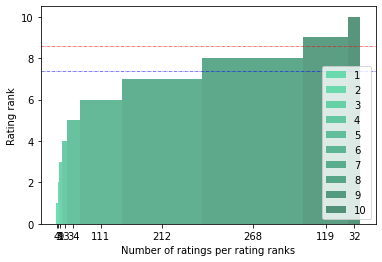

In [34]:
import matplotlib.pyplot as plt

#x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#y = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = ratings_distribution_for_user.index.to_list()
y = ratings_distribution_for_user.index.to_list()

#w = [4, 3, 9, 13, 34, 111, 212, 268, 119, 32]
w = ratings_distribution_for_user["rate"].to_list()

colors = ["#4FD5A1", "#4FD5A1","#4BCA98","#47BE90","#42B387","#3EA87F","#3A9D76","#36926E","#328665", "#2E7B5D"]

#plt.bar(x, height = y, width = w, color = colors, alpha = 0.8)

xticks=[]
for n, c in enumerate(w):
    xticks.append(sum(w[:n]) + w[n]/2)
    
w_new = [i/max(w) for i in w]
a = plt.bar(xticks, height = y, width = w, color = colors, alpha = 0.8)
_ = plt.xticks(xticks, w)

plt.legend(a.patches, x)
plt.axhline(y=average_rating_top_recommended, linewidth=0.5, color='r', ls = '-.', label = 'h')
plt.axhline(y=avg_rating_from_user, linewidth=0.5, color='b', ls = '-.')
plt.xlabel("Number of ratings per rating ranks")
plt.ylabel("Rating rank")
plt.rcParams["figure.figsize"] = (10,5)

plt.show()

# Statistics and graphs


## Raw dataset statistics



* Number of movies: 78628, after filter 2831
* Distribution Genres (/)
* Duration distribution (/)
* Distribution of topics (x)
* Number of actors (x)
* Number of directors (x)
* Number of diferent countries (/)
* Country distribution (/)


---

* Number of users: 481
* Feature distribution (Done)

---

* Number of ratings: 1172038
* Average ratings: 6.04134
* Distribution ratings (/)
* Date of rating distribution (/)
* Avg rating per week day distribution (x)
* Distribution number of ratings per user (/)

## Movies statistics

Country distribution

In [35]:
movies_cleanup, countries = cleanup_and_flatmap_column(movies_df, "country_name")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`


Number of different countries: 200


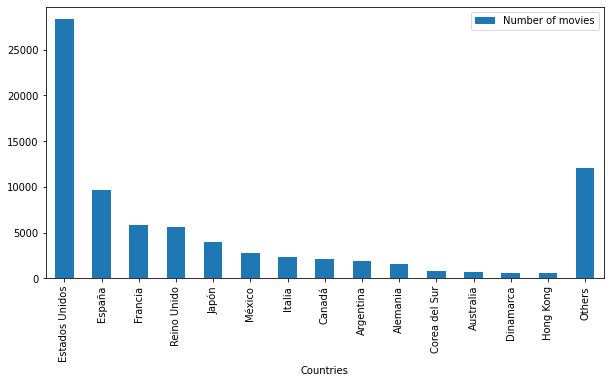

In [36]:

print("Number of different countries: " + str(movies_cleanup["country_name"].value_counts().shape[0]))
top_countries = movies_cleanup["country_name"].value_counts().to_frame().head(14).reset_index()
total_number_of_movies = movies_cleanup.shape[0]
number_of_movies_from_top_countries = top_countries["country_name"].sum()
number_of_movies_for_the_rest = total_number_of_movies - number_of_movies_from_top_countries
top_countries = top_countries.append({'index' : 'Others', 'country_name' : number_of_movies_for_the_rest} , 
                    ignore_index=True).set_index("index")

top_countries.rename(columns = {'country_name':'Number of movies'}, inplace = True)
top_countries.plot.bar(y="Number of movies", figsize=(10, 5), xlabel="Countries")



Duration distribution

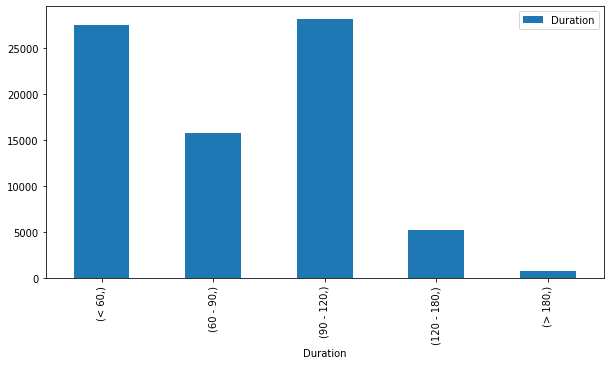

In [37]:
def classify_duration(x):
  if x < 60:
    return "< 60"
  elif (x >= 60) & (x < 90):
    return "60 - 90"
  elif (x >= 90) & (x < 120):
    return "90 - 120"
  elif (x >= 120) & (x < 180):
    return "120 - 180"
  elif x > 180:
    return "> 180"

movies_df["duration-enum"] = movies_df["duration"].apply(lambda x: classify_duration(x))
duration_distribution = movies_df[["duration-enum"]].value_counts().to_frame()
duration_distribution = duration_distribution.loc[["< 60", "60 - 90", "90 - 120", "120 - 180", "> 180"], :] 

duration_distribution.rename(columns = {0:'Duration'}, inplace = True)
duration_distribution.plot.bar(y='Duration', figsize=(10, 5), xlabel="Duration")

Distribution of genres

In [38]:
movies_df, all_genres = cleanup_and_flatmap_column(movies_df, "genres")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


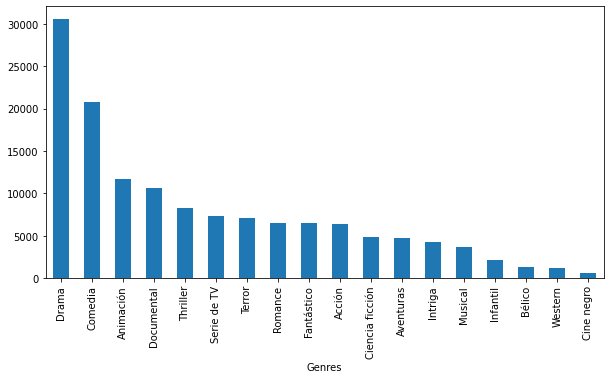

In [39]:
genres_distribution = movies_df[all_genres].sum()
genres_distribution.drop('Desconocido', inplace = True, errors='ignore')
genres_distribution.drop('NOT_PROVIDED', inplace = True, errors='ignore')
genres_distribution.sort_values(ascending = False).plot.bar(y='Duration', figsize=(10, 5), xlabel="Genres")

## Distribution of user profile features

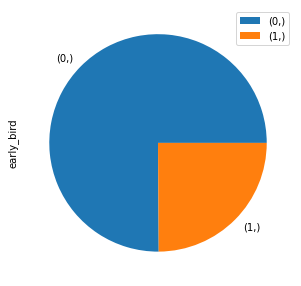

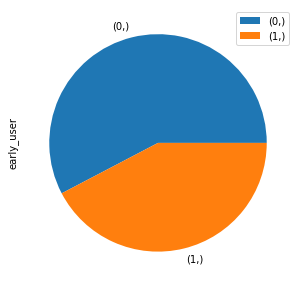

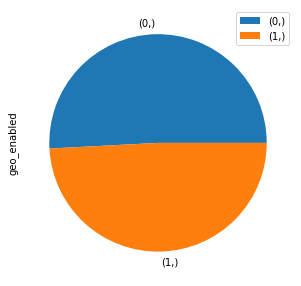

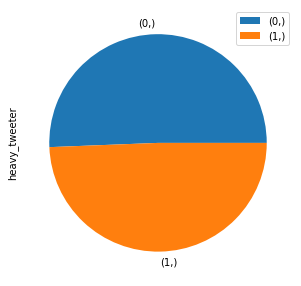

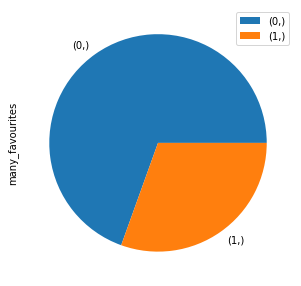

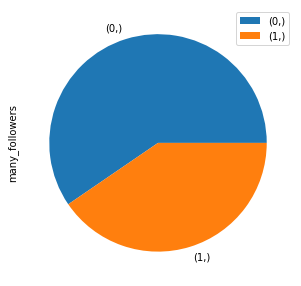

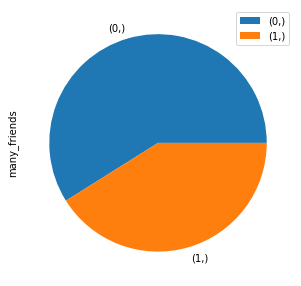

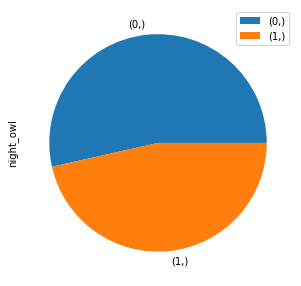

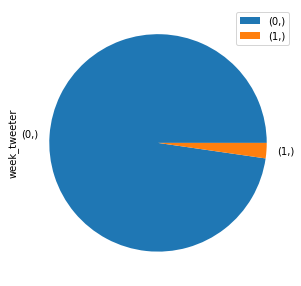

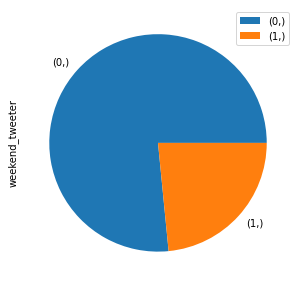

In [40]:
for column in user_profiles.columns:
  
  distribution = user_profiles[[column]].value_counts().to_frame()
  distribution.rename(columns={ 0: column}, inplace = True)
  distribution.plot.pie(y=column, figsize=(5,5))

## Distribution of ratings


In [41]:
ratings_df[["rate"]].mean()

rate    6.04134
dtype: float64

Ratings distribution

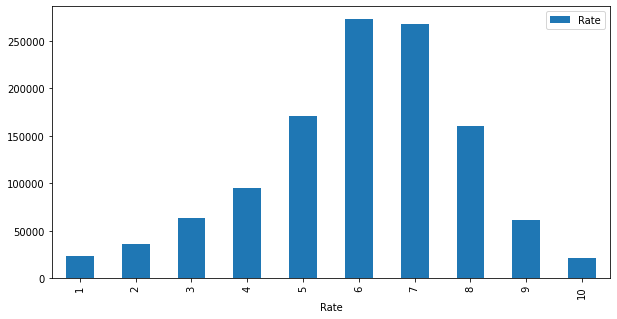

In [42]:
ratings_distribution = ratings_df["rate"].value_counts().sort_index().to_frame()
ratings_distribution.rename(columns = {"rate":'Rate'}, inplace = True)
ratings_distribution.plot.bar(y='Rate', figsize=(10, 5), xlabel="Rate")

Distribution rating by day of the week

In [43]:
ratings_df["day_of_the_week"] = ratings_df["date"].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date().weekday())

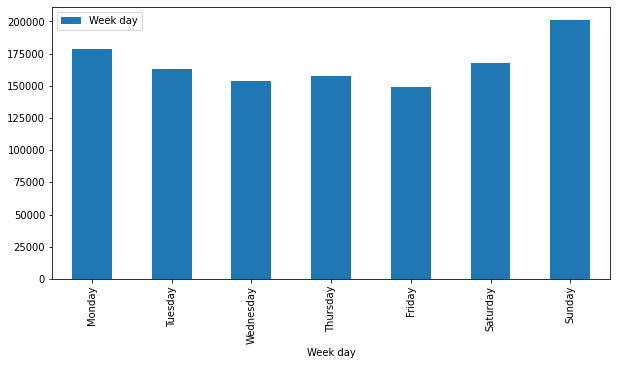

In [44]:
ratings_per_weekday_distribution = ratings_df["day_of_the_week"].value_counts().sort_index().to_frame().reset_index()
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ratings_per_weekday_distribution["index"] = ratings_per_weekday_distribution["index"].apply(lambda x: days [x])
ratings_per_weekday_distribution = ratings_per_weekday_distribution.set_index("index")
ratings_per_weekday_distribution.rename(columns={ "day_of_the_week": "Week day"}, inplace = True)
ratings_per_weekday_distribution.plot.bar(y="Week day", figsize=(10, 5), xlabel="Week day")

Rating avg by day of the week

In [45]:
ratings_df[["day_of_the_week", "rate"]].groupby("day_of_the_week").mean()

,rate
day_of_the_week,
0,6.039573
1,6.007480
2,6.015555
3,6.071690
4,6.052625
5,6.059153
6,6.043078


Classify users by number of ratings

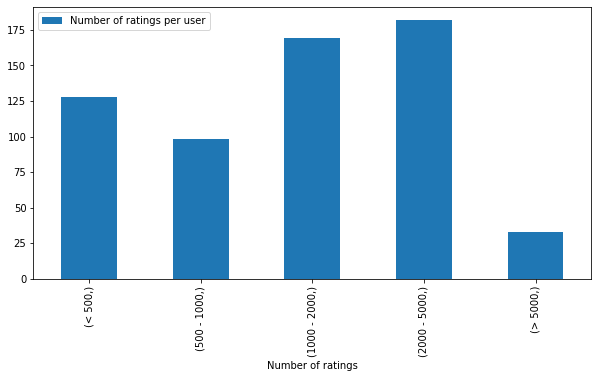

In [46]:
#ratings_df["id"].
def classify_number_of_ratings(x):
  if x < 500:
    return "< 500"
  elif (x >= 500) & (x < 1000):
    return "500 - 1000"
  elif (x >= 1000) & (x < 2000):
    return "1000 - 2000"
  elif (x >= 2000) & (x < 5000):
    return "2000 - 5000"
  elif x > 5000:
    return "> 5000"
ratings_per_user_distribution = ratings_df["id"].value_counts().to_frame().rename(columns={ "id": "count"})


ratings_per_user_distribution["number_of_ratings"] = ratings_per_user_distribution["count"].apply(lambda x: classify_number_of_ratings(x))

ratings_per_user_distribution = ratings_per_user_distribution[["number_of_ratings"]].value_counts().to_frame()
ratings_per_user_distribution = ratings_per_user_distribution.loc[["< 500", "500 - 1000", "1000 - 2000", "2000 - 5000", "> 5000"], :] 
ratings_per_user_distribution.rename(columns = {0:'Number of ratings per user'}, inplace = True)
ratings_per_user_distribution.plot.bar(y='Number of ratings per user', figsize=(10, 5), xlabel="Number of ratings")

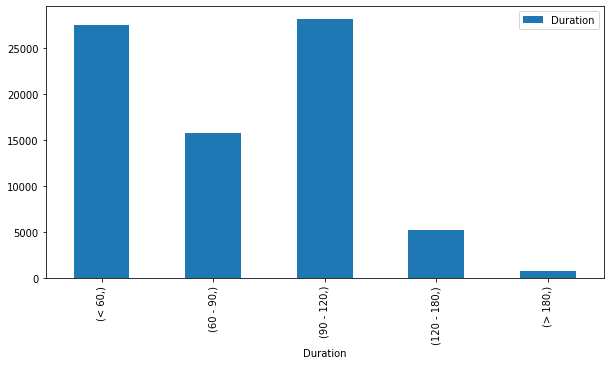

In [47]:



movies_df["duration-enum"] = movies_df["duration"].apply(lambda x: classify_duration(x))
duration_distribution = movies_df[["duration-enum"]].value_counts().to_frame()
duration_distribution = duration_distribution.loc[["< 60", "60 - 90", "90 - 120", "120 - 180", "> 180"], :] 

duration_distribution.rename(columns = {0:'Duration'}, inplace = True)
duration_distribution.plot.bar(y='Duration', figsize=(10, 5), xlabel="Duration")